# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.553  1  0.856 0.356 0.004   
                             age        0.162  1  0.251 0.617 0.001   
                             Kiel       2.486  1  3.847 0.051 0.020   
                             Magdeburg  5.143  1  7.960 0.005 0.040   
                             Sweden     8.208  1 12.705 0.000 0.062   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.009  1  0.009 0.925 0.000   
                             age        0.373  1  0.373 0.542 0.002   
                             Kiel       0.005  1  0.005 0.945 0.000   
                             Magdeburg  2.208  1  2.208 0.139 0.011   
                             Sweden    11.524  1 11.523 0.001 0.057   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.449  0.520    False  
                             age               0.210  0.746    False  
                             Kiel              1.290  0.125    False  
                             Magdeburg         2.277  0.020     True  
                             Sweden            3.336  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.034  0.955    False  
                             age               0.266  0.686    False  
                             Kiel              0.024  0.967    False  
                             Magdeburg         0.857  0.267    False  
                             Sweden            3.078  0.004     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.714  1  4.473 0.036 0.023   
                             age        0.018  1  0.113 0.737 0.001   
                             Kiel       0.443  1  2.776 0.097 0.014   
                             Magdeburg  0.922  1  5.776 0.017 0.029   
                             Sweden     2.408  1 15.086 0.000 0.073   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.046  1  1.025 0.313 0.005   
                             age        0.646  1  0.324 0.570 0.002   
                             Kiel       7.262  1  3.640 0.058 0.019   
                             Magdeburg 15.306  1  7.671 0.006 0.039   
                             Sweden     0.942  1  0.472 0.493 0.002   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.447  0.087    False  
                             age               0.132  0.827    False  
                             Kiel              1.012  0.191    False  
                             Magdeburg         1.764  0.048     True  
                             Sweden            3.849  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.505  0.461    False  
                             age               0.244  0.693    False  
                             Kiel              1.237  0.128    False  
                             Magdeburg         2.210  0.021     True  
                             Sweden            0.307  0.627    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.356         0.449  0.520    False   
                             Kiel      0.051         1.290  0.125    False   
                             Magdeburg 0.005         2.277  0.020     True   
                             Sweden    0.000         3.336  0.003     True   
                             age       0.617         0.210  0.746    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.925         0.034  0.955    False   
                             Kiel      0.945         0.024  0.967    False   
                             Magdeburg 0.139         0.857  0.267    False   
                             Sweden    0.001         3.078  0.004     True   
                             age       0.542         0.266  0.686    False   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.036         1.447  0.087    False  
                             Kiel      0.097         1.012  0.191    False  
                             Magdeburg 0.017         1.764  0.048     True  
                             Sweden    0.000         3.849  0.001     True  
                             age       0.737         0.132  0.827    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.313         0.505  0.461    False  
                             Kiel      0.058         1.237  0.128    False  
                             Magdeburg 0.006         2.210  0.021     True  
                             Sweden    0.493         0.307  0.627    False  
                             age       0.570         0.244  0.693    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.261         2.478     0.338     0.243         2.741     0.309
std       0.302         5.332     0.330     0.297         5.137     0.324
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.331     0.016     0.002         0.367     0.008
50%       0.123         0.911     0.246     0.090         1.045     0.180
75%       0.467         2.405     0.622     0.429         2.711     0.572
max       1.000       145.575     1.000     1.000        85.660     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_48816/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.356         0.449   
A0A024R0T9;K7ER74;P02655                           AD     0.036         1.449   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.118         0.928   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.502         0.299   
A0A075B6H7                                         AD     0.211         0.676   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.051         1.289   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.308         0.511   
S4R3U6                                             AD     0.925         0.034   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.520    False   
A0A024R0T9;K7ER74;P02655                           AD      0.093    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.239    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.654    False   
A0A075B6H7                                         AD      0.362    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.318    False   
Q9Y6X5                                             AD      0.125    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.182    False   
Q9Y6Y9                                             AD      0.472    False   
S4R3U6                                             AD      0.955    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.036         1.447   
A0A024R0T9;K7ER74;P02655                           AD     0.035         1.461   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.383         0.417   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.298         0.526   
A0A075B6H7                                         AD     0.053         1.278   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.034         1.463   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.577         0.239   
S4R3U6                                             AD     0.313         0.505   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.087    False  
A0A024R0T9;K7ER74;P02655                           AD      0.085    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.530    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.445    False  
A0A075B6H7                                         AD      0.118    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.252         1.410     0.335     0.244         1.488     0.317
std       0.289         1.633     0.315     0.283         1.750     0.310
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.011         0.364     0.037     0.010         0.367     0.030
50%       0.125         0.902     0.249     0.108         0.967     0.208
75%       0.432         1.956     0.591     0.430         2.018     0.573
max       0.998        23.141     0.999     1.000        22.580     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1023,999


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.356         0.449  0.520   
A0A024R0T9;K7ER74;P02655                           0.036         1.449  0.093   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.118         0.928  0.239   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.502         0.299  0.654   
A0A075B6H7                                         0.211         0.676  0.362   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.318   
Q9Y6X5                                             0.051         1.289  0.125   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.182   
Q9Y6Y9                                             0.308         0.511  0.472   
S4R3U6                                             0.925         0.034  0.955   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.036   
A0A024R0T9;K7ER74;P02655                              False 0.035   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.383   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.298   
A0A075B6H7                                            False 0.053   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.034   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.577   
S4R3U6                                                False 0.313   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.447  0.087   
A0A024R0T9;K7ER74;P02655                                   1.461  0.085   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.417  0.530   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.526  0.445   
A0A075B6H7                                                 1.278  0.118   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.303   
Q9Y6X5                                                     1.463  0.085   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.170   
Q9Y6Y9                                                     0.239  0.699   
S4R3U6                                                     0.505  0.461   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    963
PI (yes) - QRILC (yes)   362
PI (no)  - QRILC (yes)    60
PI (yes) - QRILC (no)     36
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_48816/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A087WVV2;A0A0A0MRV0;Q9P2E9;Q9P2E9-2;V9GY78       0.074         1.128  0.167   
A0A087WWT2;Q9NPD7                                  0.044         1.360  0.110   
A0A087X0M8                                         0.017         1.777  0.051   
A0A087X1G7;A0A0B4J1S4;O60613                       0.074         1.131  0.166   
A0A0A0MS20;A0A0A0MSZ8;A0A0G2JM38;A0A0G2JM43;A0A... 0.080         1.099  0.176   
...                                                  ...           ...    ...   
Q9NYX4                                             0.039         1.404  0.101   
Q9NZR2                                             0.015         1.812  0.048   
Q9P0K9                                             0.035         1.462  0.091   
Q9UJ14                                             0.006         2.213  0.023   
Q9UQ52                                             0.044         1.361  0.109   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A087WVV2;A0A0A0MRV0;Q9P2E9;Q9P2E9-2;V9GY78          False 0.009   
A0A087WWT2;Q9NPD7                                     False 0.005   
A0A087X0M8                                            False 0.003   
A0A087X1G7;A0A0B4J1S4;O60613                          False 0.013   
A0A0A0MS20;A0A0A0MSZ8;A0A0G2JM38;A0A0G2JM43;A0A...    False 0.010   
...                                                     ...   ...   
Q9NYX4                                                False 0.007   
Q9NZR2                                                 True 0.056   
Q9P0K9                                                False 0.010   
Q9UJ14                                                 True 0.044   
Q9UQ52                                                False 0.014   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A087WVV2;A0A0A0MRV0;Q9P2E9;Q9P2E9-2;V9GY78               2.065  0.027   
A0A087WWT2;Q9NPD7                                          2.321  0.017   
A0A087X0M8                                                 2.570  0.010   
A0A087X1G7;A0A0B4J1S4;O60613                               1.874  0.039   
A0A0A0MS20;A0A0A0MSZ8;A0A0G2JM38;A0A0G2JM43;A0A...         1.981  0.032   
...                                                          ...    ...   
Q9NYX4                                                     2.134  0.024   
Q9NZR2                                                     1.250  0.125   
Q9P0K9                                                     1.992  0.031   
Q9UJ14                                                     1.360  0.102   
Q9UQ52                                                     1.847  0.041   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A087WVV2;A0A0A0MRV0;Q9P2E9;Q9P2E9-2;V9GY78           True       185  
A0A087WWT2;Q9NPD7                                      True       193  
A0A087X0M8                                             True       189  
A0A087X1G7;A0A0B4J1S4;O60613                           True       184  
A0A0A0MS20;A0A0A0MSZ8;A0A0G2JM38;A0A0G2JM43;A0A...     True       166  
...                                                     ...       ...  
Q9NYX4                                                 True       195  
Q9NZR2                                                False       145  
Q9P0K9                                                 True       192  
Q9UJ14                               

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.520,0.087,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.093,0.085,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.239,0.530,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.654,0.445,196,PI (no) - QRILC (no)
A0A075B6H7,0.362,0.118,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.318,0.303,197,PI (no) - QRILC (no)
Q9Y6X5,0.125,0.085,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.182,0.170,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.908,0.006,86,PI (no) - QRILC (yes),0.902
A0A1W2PQ94;B4DS77;B4DS77-2;B4DS77-3,0.539,0.011,69,PI (no) - QRILC (yes),0.528
P09960;P09960-4,0.024,0.526,152,PI (yes) - QRILC (no),0.502
P48147,0.048,0.512,79,PI (yes) - QRILC (no),0.464
F6SYF8;Q9UBP4,0.419,0.005,196,PI (no) - QRILC (yes),0.414
...,...,...,...,...,...
P23468-2,0.048,0.064,152,PI (yes) - QRILC (no),0.016
Q96RW7;Q96RW7-2,0.054,0.045,80,PI (no) - QRILC (yes),0.010
Q9BS26,0.043,0.053,123,PI (yes) - QRILC (no),0.010


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


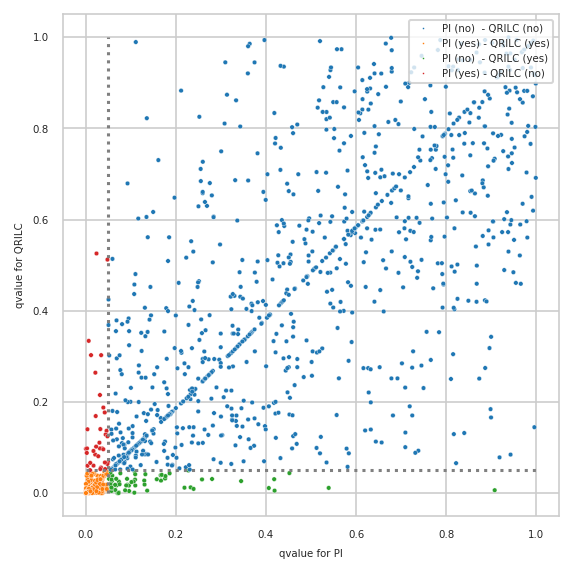

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


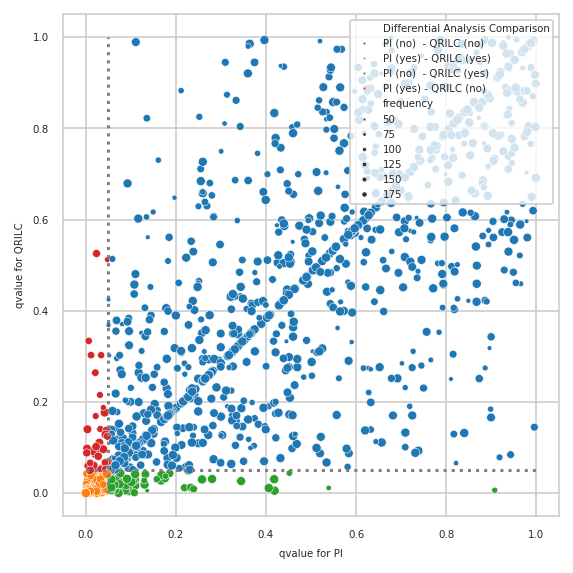

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
PSEN2,ENSP00000355747,5.000
MAPT,ENSP00000340820,4.800
...,...,...
FRAT2,ENSP00000360058,0.681
CLEC4M,ENSP00000316228,0.681
DSC2,ENSP00000280904,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/3fa5fb1d5dd2a817778dc1597a6471cf_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out